# Statisitical analysis of Discharge data


In [70]:
import matplotlib.pyplot as plt
import pandas as pd
import pylab as pl
import 
numpy as np
%matplotlib inline

In [71]:
df = pd.read_csv('dischargedata.csv')

# take a look at the dataset
df.head()

,sl no,Billing,Treating_Doctor,Pending_Evaluations,Discharge_TAT
0,1,Insurance,Doc2,yes,140
1,2,Self,Doc4,No,122
2,3,Insurance,Doc3,yes,153
3,4,Self,Doc6,No,132
4,5,Self,Doc3,yes,139


In [72]:
#one hot encoding for treaing doc and pending eva.. deleting billing coz not significant
del df['Billing']
for column in df.columns:
    if df[column].dtype==object:
        dummyCols=pd.get_dummies(df[column])
        df=df.join(dummyCols)
        del df[column]
df

,sl no,Discharge_TAT,Doc1,Doc2,Doc3,Doc4,Doc5,Doc6,No,yes
0,1,140,0,1,0,0,0,0,0,1
1,2,122,0,0,0,1,0,0,1,0
2,3,153,0,0,1,0,0,0,0,1
3,4,132,0,0,0,0,0,1,1,0
4,5,139,0,0,1,0,0,0,0,1
5,6,119,0,0,0,0,0,1,1,0
6,7,225,1,0,0,0,0,0,0,1
7,8,210,1,0,0,0,0,0,0,1
8,9,155,0,0,1,0,0,0,0,1
9,10,173,0,0,1,0,0,0,0,1


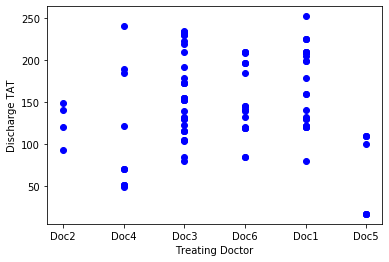

In [73]:
plt.scatter(cdf.Treating_Doctor, cdf.Discharge_TAT,  color='blue')
plt.xlabel("Treating Doctor")
plt.ylabel("Discharge TAT")
plt.show()

In [84]:
msk = np.random.rand(len(df)) < 0.8
train = df[msk]
test = df[~msk]
train.to_csv('dischargetrainset.csv')
test.to_csv('dischargetestset.csv')
train.describe(include='all')
#train.to_csv('test_encoded.csv')

In [93]:
from sklearn.linear_model import LinearRegression
model_1 = linear_model.LinearRegression()
x = np.asanyarray(train[['Doc1','Doc2','Doc3','Doc4','Doc5','Doc6','No','yes']])
y = np.asanyarray(train[['Discharge_TAT']])
#x=list(x)
#y=list (y)
model_1.fit (x, y)
print ('Coefficients: ', model_1.coef_)
print("intercept: ", model_1.intercept_)

Coefficients:  [[ 37.22850149 -17.49787949  21.51482885  -1.56004611 -59.01060861
   19.32520387 -40.40675007  40.40675007]]
intercept:  [131.36229613]


In [88]:
y_hat= model_1.predict(x)
print("Residual sum of squares: %.2f"
      % np.mean((y_hat - y) ** 2))

# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % model_1.score(x, y))
#print(y_hat) predicted value of train set

Residual sum of squares: 640.44
Variance score: 0.80


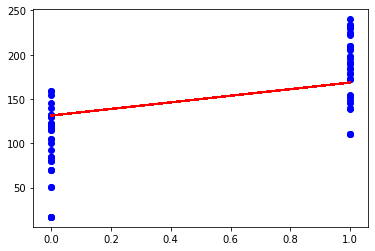

In [97]:
#interval plot showing variance
plt.scatter(train.yes, train.Discharge_TAT,  color='blue')
plt.plot(x, model_1.coef_[0][0]*x + model_1.intercept_[0], '-r')

In [100]:
#checking in complete data dset
w=np.asanyarray(df[['Doc1','Doc2','Doc3','Doc4','Doc5','Doc6','No','yes']])
z=np.asanyarray(df[['Discharge_TAT']])
z_hat= model_1.predict(w)
print("Residual sum of squares: %.2f"
      % np.mean((z_hat - z) ** 2))

# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % model_1.score(w, z))
#print(y_hat) predicted value of train set

Residual sum of squares: 717.40
Variance score: 0.77
